# **Reading data**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from scipy.stats import uniform
import tensorflow as tf


In [ ]:
df = pd.read_csv('adult.csv')

In [ ]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


**fnlwgt means how many number of population that take same entry with similar characteristics in the broader population.**

In [ ]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


# **Cleaning data**

In [ ]:
df.value_counts()

age  workclass         fnlwgt  education     educational-num  marital-status      occupation         relationship   race   gender  capital-gain  capital-loss  hours-per-week  native-country  income
21   Private           243368  Preschool     1                Never-married       Farming-fishing    Not-in-family  White  Male    0             0             50              Mexico          <=50K     3
25   Private           308144  Bachelors     13               Never-married       Craft-repair       Not-in-family  White  Male    0             0             40              Mexico          <=50K     3
                       195994  1st-4th       2                Never-married       Priv-house-serv    Not-in-family  White  Female  0             0             40              Guatemala       <=50K     3
30   Private           180317  Assoc-voc     11               Divorced            Machine-op-inspct  Not-in-family  White  Male    0             0             40              United-States   <=50K     2
                       111567  HS-grad       9                Never-married       Craft-repair       Own-child      White  Male    0             0             48              United-States   <=50K     2
                                                                                                                                                                                                        ..
31   Private           155914  Some-college  10               Married-civ-spouse  Farming-fishing    Husband        White  Male    0             0             40              United-States   <=50K     1
                       156192  Some-college  10               Married-civ-spouse  Craft-repair       Husband        White  Male    0             0             40              United-States   >50K      1
                       156464  10th          6                Divorced            Other-service      Not-in-family  White  Male    0             0             40              United-States   <=50K     1
                               Bachelors     13               Never-married       Prof-specialty     Own-child      White  Male    0             0             25              United-States   <=50K     1
90   Self-emp-not-inc  282095  Some-college  10               Married-civ-spouse  Farming-fishing    Husband        White  Male    0             0             40              United-States   <=50K     1
Name: count, Length: 48790, dtype: int64

In [ ]:
df = df.drop_duplicates()

In [ ]:
ftrs = df.columns.to_list()
for col in ftrs:
  unknown_count = len(df) - ((df[col]=='?').value_counts()[0])
  if (unknown_count > 0):
    print(f"number of ? in {col} is {unknown_count}")

number of ? in workclass is 2795
number of ? in occupation is 2805
number of ? in native-country is 856


<ipython-input-7-6d9e9d5cc220>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  unknown_count = len(df) - ((df[col]=='?').value_counts()[0])


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48790 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48790 non-null  int64 
 1   workclass        48790 non-null  object
 2   fnlwgt           48790 non-null  int64 
 3   education        48790 non-null  object
 4   educational-num  48790 non-null  int64 
 5   marital-status   48790 non-null  object
 6   occupation       48790 non-null  object
 7   relationship     48790 non-null  object
 8   race             48790 non-null  object
 9   gender           48790 non-null  object
 10  capital-gain     48790 non-null  int64 
 11  capital-loss     48790 non-null  int64 
 12  hours-per-week   48790 non-null  int64 
 13  native-country   48790 non-null  object
 14  income           48790 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


*   **Since the missing data are in object types so they will not affecting when standardizing data**
*   **Not gonna edit anything in the missing data untill knowing the impact of the features that have missing data; if their impact is high then we have to do thing with them, if not then there's no need to play with them**

# **Feature Engineering**

### adding new columns

In [ ]:
df['net-capital'] = (df['capital-gain'] - df['capital-loss'])

### Dropping unnecessary columns

In [ ]:
df = df.drop(['capital-gain','capital-loss'], axis = 1)

In [ ]:
df['education'].value_counts()

,count
education,
HS-grad,15770
Some-college,10863
Bachelors,8013
Masters,2656
Assoc-voc,2060
11th,1812
Assoc-acdm,1601
10th,1389
7th-8th,954


In [ ]:
df["educational-num"].value_counts()

,count
educational-num,
9,15770
10,10863
13,8013
14,2656
11,2060
7,1812
12,1601
6,1389
4,954


So it appears that educational-num represents education column but in a numerical way, so there's no need to education column anymore.

In [ ]:
if (df['education'].value_counts().tolist()==df["educational-num"].value_counts().tolist()):
  df = df.drop("education", axis = 1)
  print("education column had been dropped because educational-num represents it in a numrecal way which is better for models.")

education column had been dropped because educational-num represents it in a numrecal way which is better for models.


## Transforming data

### One-hot-encoding

In [ ]:
for col in df.columns.tolist():
  print(f"{df[col].value_counts()}", end = "\n----------\n")

age
36    1348
35    1336
33    1335
23    1325
31    1324
      ... 
88       6
85       5
87       3
89       2
86       1
Name: count, Length: 74, dtype: int64
----------
workclass
Private             33860
Self-emp-not-inc     3861
Local-gov            3136
?                    2795
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64
----------
fnlwgt
203488    21
190290    19
120277    19
125892    18
126569    18
          ..
293579     1
114874     1
96279      1
509350     1
257302     1
Name: count, Length: 28523, dtype: int64
----------
educational-num
9     15770
10    10863
13     8013
14     2656
11     2060
7      1812
12     1601
6      1389
4       954
15      834
5       756
8       655
16      594
3       507
2       245
1        81
Name: count, dtype: int64
----------
marital-status
Married-civ-spouse       22366
Never-married            16082
Divorced             

In [ ]:
df.head()

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income,net-capital
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K,0
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K,0
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K,0
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,>50K,7688
4,18,?,103497,10,Never-married,?,Own-child,White,Female,30,United-States,<=50K,0


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
df['gender'] = ordinal_encoder.fit_transform(df[['gender']])
df['workclass'] = ordinal_encoder.fit_transform(df[['workclass']])
df['marital-status'] = ordinal_encoder.fit_transform(df[['marital-status']])
df['occupation'] = ordinal_encoder.fit_transform(df[['occupation']])
df['relationship'] = ordinal_encoder.fit_transform(df[['relationship']])
df['race'] = ordinal_encoder.fit_transform(df[['race']])
df['native-country'] = ordinal_encoder.fit_transform(df[['native-country']])
df['income'] = ordinal_encoder.fit_transform(df[['income']])

### Splitting

In [ ]:
df['cat-age'] = pd.qcut(df['age'], q=10, labels=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])

df.reset_index(drop=True, inplace=True)

In [ ]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)

for train_index, temp_index in split.split(df, df['cat-age']):
    train_set = df.loc[train_index]
    temp_set = df.loc[temp_index]

In [ ]:
splitt = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=42)

for val_index, test_index in splitt.split(temp_set, temp_set["cat-age"]):
    val_set = df.loc[val_index]
    test_set = df.loc[test_index]

In [ ]:
train_set = train_set.drop(['age'], axis=1)
val_set = val_set.drop(['age'], axis=1)
test_set = test_set.drop(['age'], axis=1)

### Standardization data

In [ ]:
train_set.describe()

,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income,net-capital
count,34153.000000,3.415300e+04,34153.000000,34153.000000,34153.000000,34153.000000,34153.000000,34153.000000,34153.000000,34153.000000,34153.000000,34153.000000
mean,3.872017,1.898621e+05,10.068749,2.613533,6.560449,1.441425,3.665681,0.670044,40.412936,36.733933,0.237256,984.920680
std,1.461856,1.057886e+05,2.559783,1.509263,4.228758,1.599835,0.848758,0.470204,12.313233,7.800322,0.425407,7473.576674
min,0.000000,1.228500e+04,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-4356.000000
25%,4.000000,1.176180e+05,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,40.000000,39.000000,0.000000,0.000000
50%,4.000000,1.783100e+05,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,40.000000,39.000000,0.000000,0.000000
75%,4.000000,2.378680e+05,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,45.000000,39.000000,0.000000,0.000000
max,8.000000,1.490400e+06,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99.000000,41.000000,1.000000,99999.000000


<Axes: >

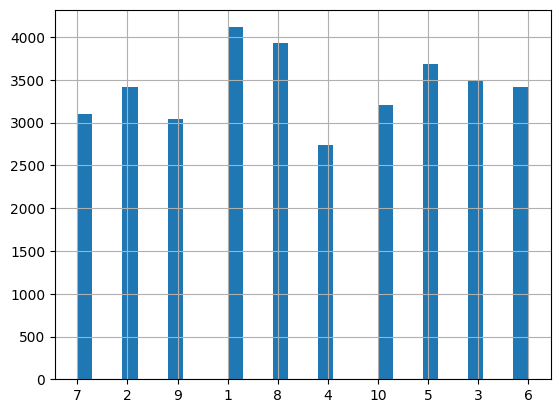

In [ ]:
train_set['cat-age'].hist(bins = 30)

In [ ]:
train_set.sort_values(by=['cat-age']).tail(10)

,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income,net-capital,cat-age
39079,4.0,26254,9,0.0,4.0,1.0,4.0,0.0,40,39.0,0.0,0,10
17161,0.0,149698,10,2.0,0.0,0.0,4.0,1.0,15,39.0,0.0,0,10
26627,4.0,190568,9,6.0,1.0,1.0,4.0,0.0,36,39.0,0.0,-810,10
32514,4.0,151540,7,6.0,13.0,4.0,4.0,0.0,16,39.0,0.0,0,10
43644,4.0,221447,9,4.0,7.0,1.0,2.0,0.0,40,39.0,0.0,0,10
5306,5.0,126225,9,2.0,4.0,0.0,4.0,1.0,40,39.0,1.0,0,10
38012,0.0,233182,9,0.0,0.0,1.0,4.0,0.0,7,39.0,0.0,0,10
41462,4.0,192290,6,2.0,1.0,0.0,4.0,1.0,20,39.0,0.0,0,10
14366,4.0,81605,9,2.0,3.0,0.0,4.0,1.0,45,39.0,0.0,0,10
11514,0.0,116080,16,2.0,0.0,0.0,4.0,1.0,2,39.0,1.0,0,10


In [ ]:
std_train = train_set.copy()
std_val = val_set.copy()
std_test = test_set.copy()

In [ ]:
std_object = StandardScaler()

std_train[['cat-age','fnlwgt','hours-per-week','net-capital']] = std_object.fit_transform(std_train[['cat-age','fnlwgt','hours-per-week','net-capital']])

std_val[['cat-age','fnlwgt','hours-per-week','net-capital']] = std_object.fit_transform(std_val[['cat-age','fnlwgt','hours-per-week','net-capital']])

std_test[['cat-age','fnlwgt','hours-per-week','net-capital']] = std_object.fit_transform(std_test[['cat-age','fnlwgt','hours-per-week','net-capital']])

# **A quick look to the data**

array([[<Axes: title={'center': 'workclass'}>,
        <Axes: title={'center': 'fnlwgt'}>,
        <Axes: title={'center': 'educational-num'}>],
       [<Axes: title={'center': 'marital-status'}>,
        <Axes: title={'center': 'occupation'}>,
        <Axes: title={'center': 'relationship'}>],
       [<Axes: title={'center': 'race'}>,
        <Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'hours-per-week'}>],
       [<Axes: title={'center': 'native-country'}>,
        <Axes: title={'center': 'income'}>,
        <Axes: title={'center': 'net-capital'}>]], dtype=object)

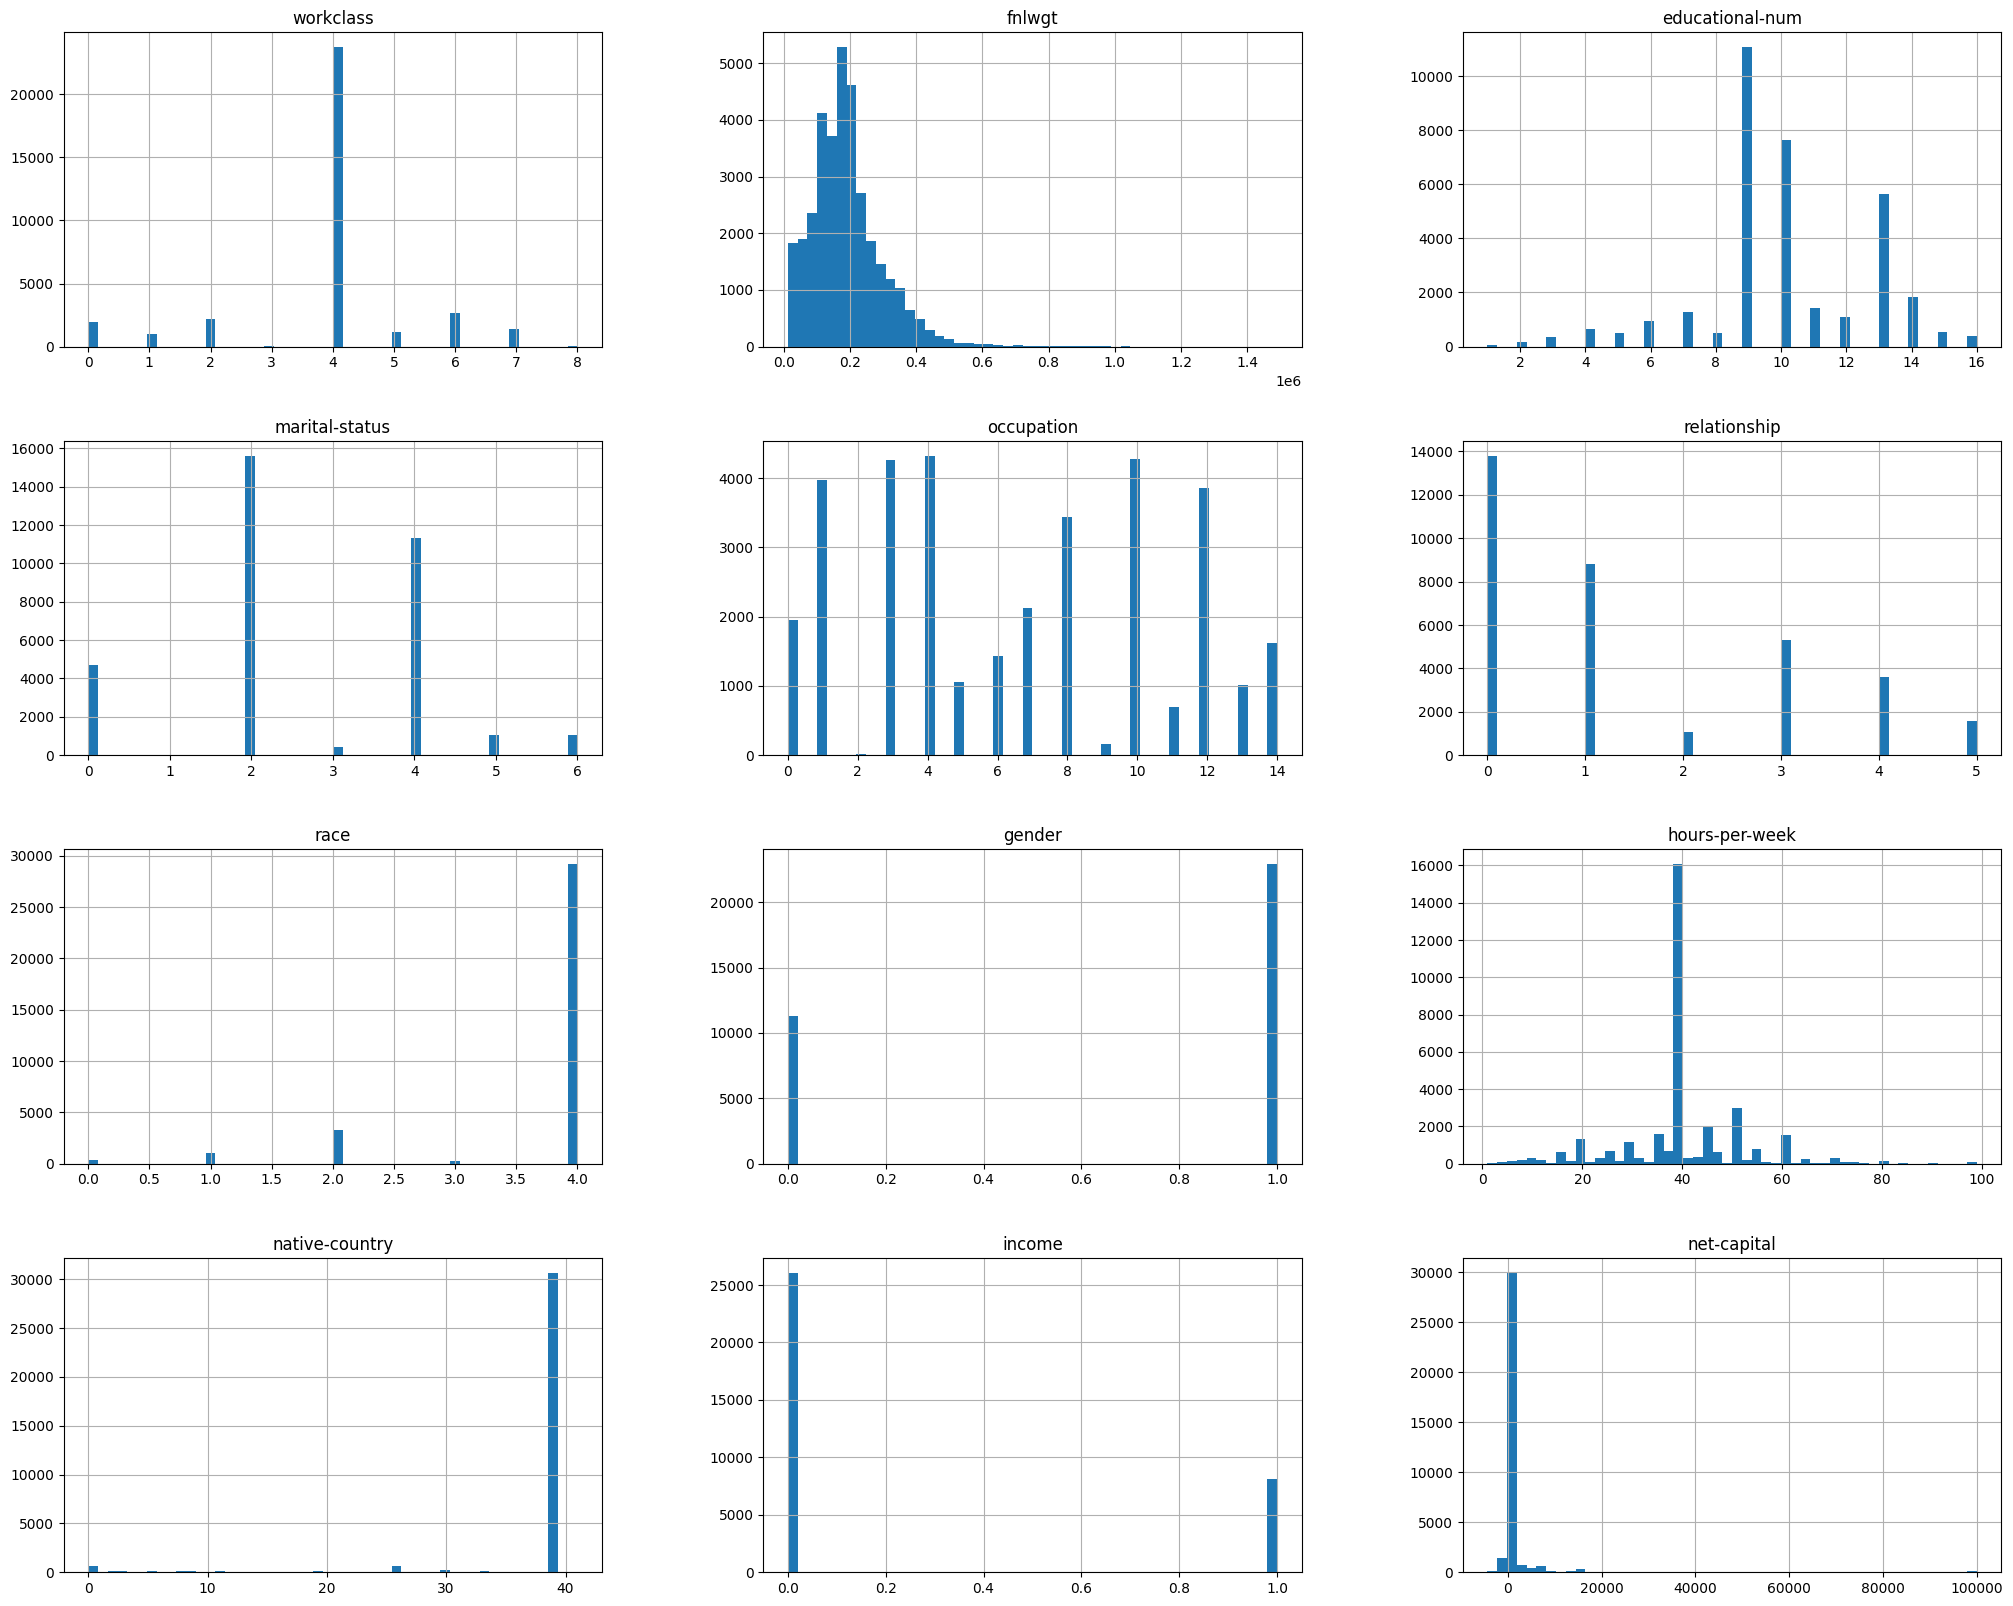

In [ ]:
import matplotlib.pyplot as plt
train_set.hist(bins=50, figsize=(25,20))

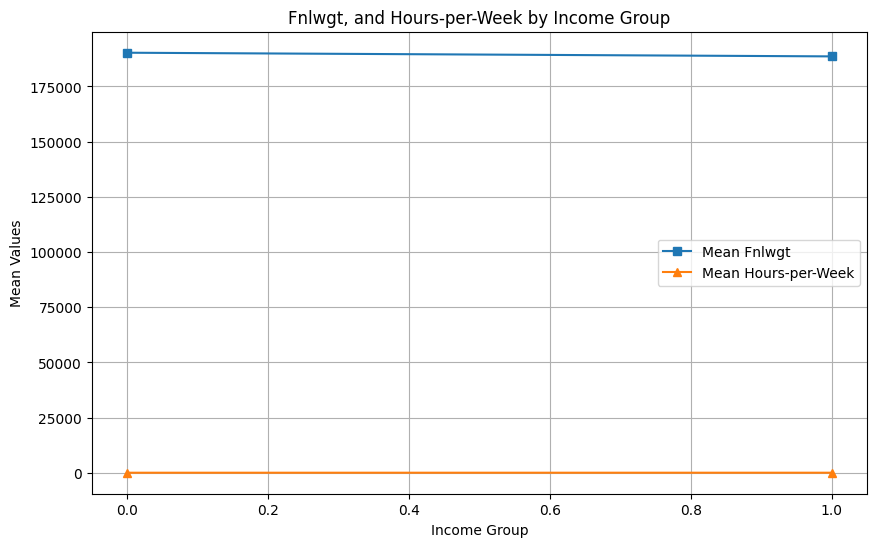

In [ ]:
fnlwgt = train_set.groupby(['income']).agg(fnlwgt=('fnlwgt', 'mean'))
hours_per_week = train_set.groupby(['income']).agg(hours_per_week=('hours-per-week', 'mean'))

# Merging the aggregated results for easier plotting
merged_train_set = pd.concat([fnlwgt, hours_per_week], axis=1)

# Plotting
plt.figure(figsize=(10, 6))

# Plot each column in the merged dataframe
plt.plot(merged_train_set.index, merged_train_set['fnlwgt'], marker='s', label='Mean Fnlwgt')
plt.plot(merged_train_set.index, merged_train_set['hours_per_week'], marker='^', label='Mean Hours-per-Week')

# Adding labels and title
plt.xlabel('Income Group')
plt.ylabel('Mean Values')
plt.title('Fnlwgt, and Hours-per-Week by Income Group')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


# **Stratified Splitting**

In [ ]:
# df['Elevation'].hist(bins=150, figsize=(16,8), )

In [ ]:
# df["Elevation_cat"] = df["Elevation_cat"].astype(int)

In [ ]:
# scaler = StandardScaler()

# # x_train = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)
# scaler.fit_transform(x_train.values.reshape(-1,1))
# print(x_train)

# **Looking for correlation**

In [ ]:
corr_matrix = train_set.corr()
corr_matrix

,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income,net-capital,cat-age
workclass,1.000000,-0.016609,0.054786,-0.070089,0.255799,-0.092579,0.057598,0.089233,0.146660,-0.010954,0.048828,0.033055,0.038131
fnlwgt,-0.016609,1.000000,-0.037519,0.034875,-0.000834,0.011038,-0.030236,0.026424,-0.015693,-0.049547,-0.006671,-0.005465,-0.077874
educational-num,0.054786,-0.037519,1.000000,-0.067162,0.112431,-0.092610,0.023558,0.013276,0.139644,0.052525,0.329578,0.120419,0.050249
marital-status,-0.070089,0.034875,-0.067162,1.000000,-0.020047,0.184137,-0.068520,-0.129107,-0.185487,-0.027545,-0.195120,-0.038850,-0.321502
occupation,0.255799,-0.000834,0.112431,-0.020047,1.000000,-0.081084,0.002588,0.078353,0.077949,-0.014951,0.077147,0.023137,0.000792
relationship,-0.092579,0.011038,-0.092610,0.184137,-0.081084,1.000000,-0.113594,-0.580542,-0.247450,-0.003817,-0.251423,-0.054900,-0.271563
race,0.057598,-0.030236,0.023558,-0.068520,0.002588,-0.113594,1.000000,0.082435,0.033881,0.142951,0.071525,0.009337,0.023628
gender,0.089233,0.026424,0.013276,-0.129107,0.078353,-0.580542,0.082435,1.000000,0.225425,-0.014516,0.213375,0.043857,0.100410
hours-per-week,0.146660,-0.015693,0.139644,-0.185487,0.077949,-0.247450,0.033881,0.225425,1.000000,0.001200,0.226130,0.083966,0.129720
native-country,-0.010954,-0.049547,0.052525,-0.027545,-0.014951,-0.003817,0.142951,-0.014516,0.001200,1.000000,0.013138,0.001162,-0.007544


In [ ]:
corr_matrix["income"].sort_values(ascending=False)

,income
income,1.000000
educational-num,0.329578
cat-age,0.267794
hours-per-week,0.226130
net-capital,0.214483
gender,0.213375
occupation,0.077147
race,0.071525
workclass,0.048828
native-country,0.013138


# **Before Trainning**

In [ ]:
x_train = train_set.drop(['income'], axis = 1)
y_train = train_set['income']

x_val = val_set.drop(['income'], axis = 1)
y_val = val_set['income']

x_test = test_set.drop(['income'], axis = 1)
y_test = test_set['income']

In [ ]:
x_std_train = std_train.drop(['income'], axis = 1)
y_std_train = std_train['income']

x_std_val = std_val.drop(['income'], axis = 1)
y_std_val = std_val['income']

x_std_test = std_test.drop(['income'], axis = 1)
y_std_test = std_test['income']

# **Trainning the model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(x_train, y_train)
forest_pred = forest.predict(x_val)
forest.score(x_val,y_val)

KeyboardInterrupt: 

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(x_std_train, y_std_train)
lr_pred = lr_model.predict(x_std_val)
lr_model.score(x_std_val, y_std_val)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

models = {1 : "RandomForest", 2 : 'LogisticRegression'}
i = 1
for x in [forest_pred, lr_pred]:

  y_pred = x
  accuracy = accuracy_score(y_val, y_pred)

  precision = precision_score(y_val, y_pred, average='weighted')

  recall = recall_score(y_val, y_pred, average='weighted')

  f1 = f1_score(y_val, y_pred, average='weighted')

  conf_matrix = confusion_matrix(y_val, y_pred)

  print(f"For {models[i]}:")
  print("Accuracy:", accuracy)
  print("Precision:", precision)
  print("Recall:", recall)
  print("F1 Score:", f1)
  print("Confusion Matrix:")
  print(conf_matrix)
  print("________________________________________________________")
  i += 1


# **Fine Tuning**

### Random Search for RandomForest model

In [ ]:
param_dist = {
    'n_estimators': randint(100, 500),        # Number of trees in the forest
    'max_depth': [None, 10, 20, 30, 40, 50],  # Depth of each tree
    'min_samples_split': randint(2, 10),      # Minimum samples required to split an internal node
    'min_samples_leaf': randint(1, 10),       # Minimum samples required at each leaf node
    'max_features': ['auto', 'sqrt', 'log2'], # Number of features to consider for best split
    'bootstrap': [True, False]                # Whether bootstrap samples are used when building trees
}

random_search = RandomizedSearchCV(
    forest,
    param_distributions=param_dist,
    n_iter=50,                    # Number of hyperparameter settings sampled
    scoring='accuracy',            # Metric to evaluate performance
    cv=5,                          # Number of cross-validation folds
    random_state=42,
    verbose=1,
    n_jobs=-1                      # Use all available cores
)

random_search.fit(x_train, y_train)

print("Best parameters found: ", random_search.best_params_)
print("Best accuracy: ", random_search.best_score_)

best_forest = random_search.best_estimator_
validation_accuracy = best_forest.score(x_val, y_val)
print("Validation set accuracy: ", validation_accuracy)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
90 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
32 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

Best parameters found:  {'bootstrap': True, 'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 9, 'n_estimators': 316}
Best accuracy:  0.8645212367269787
Validation set accuracy:  0.8869909811423886


### Random Search for LogisticRegression model

In [ ]:
param_dist = {
    'penalty': ['l1', 'l2', 'elasticnet', None],   # Type of regularization
    'C': uniform(0.001, 10),                         # Regularization strength (small values = strong regularization)
    'solver': ['saga', 'lbfgs', 'liblinear'],        # Different solvers for optimization
    'max_iter': [100, 200, 300],                     # Maximum number of iterations
    'l1_ratio': uniform(0, 1),                       # Only used for 'elasticnet' (ratio of L1 vs L2)
}

random_search = RandomizedSearchCV(
    lr_model,
    param_distributions=param_dist,
    n_iter=50,                      # Number of hyperparameter settings sampled
    scoring='accuracy',              # Metric to evaluate model performance
    cv=5,                            # Number of cross-validation folds
    random_state=42,
    verbose=1,
    n_jobs=-1                        # Use all available cores for faster execution
)

random_search.fit(x_train, y_train)

print("Best parameters found: ", random_search.best_params_)
print("Best cross-validation accuracy: ", random_search.best_score_)

best_lr_model = random_search.best_estimator_

x_val = np.array(x_val)
y_val = np.array(y_val)

validation_accuracy = best_lr_model.score(x_val, y_val)
print("Validation set accuracy: ", validation_accuracy)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
80 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1194, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/u

Best parameters found:  {'C': 3.746401188473625, 'l1_ratio': 0.9507143064099162, 'max_iter': 300, 'penalty': None, 'solver': 'saga'}
Best cross-validation accuracy:  nan
Validation set accuracy:  0.8006285870456409


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# **Testing models**

In [ ]:
forest_pred = best_forest.predict(x_test)
best_forest.score(x_test,y_test)

0.8818144555267113

In [ ]:
x_test = np.array(x_test)
y_test = np.array(y_test)
lr_pred = best_lr_model.predict(x_test)
best_lr_model.score(x_test,y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7876759120098374

**So as shown above, RandomForest gave much best results than LogisticRegression**



# **ANN**

In [ ]:
x_train.shape

(34153, 12)

In [ ]:
# Define the neural network architecture
# Change the input_shape to (12,) to match the actual shape of x_train
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(12,)), # Changed input_shape to (12,)
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=50, batch_size=34153, validation_data=(x_val, y_val))

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.2322 - loss: 5241.3711 - val_accuracy: 0.7689 - val_loss: 899.2414
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.7632 - loss: 919.2390 - val_accuracy: 0.7689 - val_loss: 1659.3187
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.7632 - loss: 1699.1769 - val_accuracy: 0.7692 - val_loss: 1753.9762
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.7633 - loss: 1797.5044 - val_accuracy: 0.7703 - val_loss: 1559.4004
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.7637 - loss: 1598.9796 - val_accuracy: 0.7712 - val_loss: 1109.4640
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.7649 - loss: 1137.6029 - val_accuracy: 0.7736 - val_loss: 479.5818
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.7671 - loss: 492.2170 - val_accuracy: 0.2319 - val_loss: 922.4727
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.2373 - loss: 911.7006 - val

In [ ]:
# Define the neural network architecture
# Change the input_shape to (12,) to match the actual shape of x_train
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(12,)), # Changed input_shape to (12,)
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=50, batch_size=34153, validation_data=(x_val, y_val))

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.7627 - loss: 2945.6599 - val_accuracy: 0.7712 - val_loss: 1607.8318
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - accuracy: 0.7647 - loss: 1649.6941 - val_accuracy: 0.7777 - val_loss: 473.8770
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - accuracy: 0.7708 - loss: 486.1397 - val_accuracy: 0.2319 - val_loss: 2370.8499
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.2373 - loss: 2343.0159 - val_accuracy: 0.2319 - val_loss: 1557.4901
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.2373 - loss: 1539.0609 - val_accuracy: 0.7878 - val_loss: 113.9908
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.7812 - loss: 116.8274 - val_accuracy: 0.7792 - val_loss: 405.9320
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.7725 - loss: 416.3559 - val_accuracy: 0.7789 - val_loss: 535.9164
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.7717 - loss: 549.6006 - va

In [ ]:
# Define the neural network architecture
# Change the input_shape to (12,) to match the actual shape of x_train
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(12,)), # Changed input_shape to (12,)
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=50, batch_size=512, validation_data=(x_val, y_val))

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.5759 - loss: 1925.2963 - val_accuracy: 0.8009 - val_loss: 41.2721
Epoch 2/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6790 - loss: 138.4848 - val_accuracy: 0.7920 - val_loss: 113.8999
Epoch 3/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6908 - loss: 135.3240 - val_accuracy: 0.7998 - val_loss: 52.2923
Epoch 4/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6937 - loss: 101.8556 - val_accuracy: 0.7800 - val_loss: 266.6898
Epoch 5/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6745 - loss: 223.7667 - val_accuracy: 0.7898 - val_loss: 153.2185
Epoch 6/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6715 - loss: 112.7370 - val_accuracy: 0.7935 - val_loss: 114.3208
Epoch 7/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6786 - loss: 104.7028 - val_accuracy: 0.7881 - val_loss: 12.9842
Epoch 8/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6768 - loss: 39.1683 - val_accuracy: 0

In [ ]:
!pip install keras-tuner

In [ ]:
import tensorflow as tf
from tensorflow import keras
import keras_tuner as kt

# Define the hypermodel function
def build_model(hp):
    model = tf.keras.Sequential()

    # Input layer with shape based on the training data
    model.add(keras.layers.InputLayer(input_shape=(x_train.shape[1],)))

    # Tune the number of layers between 1 and 4
    for i in range(hp.Int('num_layers', 1, 4)):
        # Tune the number of units in each layer (32 to 512)
        model.add(keras.layers.Dense(units=hp.Int('units_' + str(i),
                                                  min_value=32,
                                                  max_value=512,
                                                  step=32),
                                     activation='relu'))

    # Output layer
    model.add(keras.layers.Dense(1, activation='sigmoid'))  # Binary classification

    # Tune the learning rate for the optimizer
    learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create the tuner object
tuner = kt.RandomSearch(
    build_model,  # Hypermodel function
    objective='val_accuracy',  # The metric to optimize for
    max_trials=10,  # Number of hyperparameter combinations to try
    executions_per_trial=1,  # Number of models to train for each hyperparameter set
    directory='my_dir',  # Directory to save logs and models
    project_name='hyperparameter_tuning'
)

# Define the hyperparameter grid for batch size and epochs
batch_size = [32, 64, 128, 256]
epochs = [10, 20, 30]

# Ensure the data is in the correct format
x_train = x_train.to_numpy().astype('float32')  # Convert to NumPy and ensure float32
y_train = y_train.to_numpy().astype('float32').flatten()  # Ensure float32 and 1D
x_val = x_val.to_numpy().astype('float32')      # Convert to NumPy and ensure float32
y_val = y_val.to_numpy().astype('float32').flatten()  # Ensure float32 and 1D


# Search for the best hyperparameters
tuner.search(x_train, y_train, epochs=10, validation_data=(x_val, y_val), batch_size=64)

# Retrieve the best model and hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_model = tuner.get_best_models(num_models=1)[0]

print("Best hyperparameters found:")
print("Number of layers:", best_hps.get('num_layers'))
for i in range(best_hps.get('num_layers')):
    print(f"Units in layer {i}: {best_hps.get('units_' + str(i))}")
print("Learning rate:", best_hps.get('learning_rate'))

# Re-train the best model on the full dataset (if desired)
best_model.fit(x_train, y_train, epochs=best_hps.get('epochs'), batch_size=best_hps.get('batch_size'))


Trial 10 Complete [00h 01m 08s]
val_accuracy: 0.8010385632514954

Best val_accuracy So Far: 0.8122437596321106
Total elapsed time: 00h 12m 56s


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Best hyperparameters found:
Number of layers: 3
Units in layer 0: 128
Units in layer 1: 352
Units in layer 2: 96
Learning rate: 0.01


KeyError: 'epochs does not exist.'

In [ ]:
loss, accuracy = best_model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")

229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8071 - loss: 0.4807
Test Accuracy: 80.01%
